In [4]:
import torch
import torchvision
from torchvision.datasets import MNIST

In [1]:
dataset = MNIST(root='data/',download = True)

NameError: name 'MNIST' is not defined

In [2]:
len(dataset)

NameError: name 'dataset' is not defined

In [7]:
dataset[0]

(<PIL.Image.Image image mode=L size=28x28 at 0x27BB0BEC860>, 5)

In [8]:
import matplotlib.pyplot as plt
%matplotlib inline

Label: 5


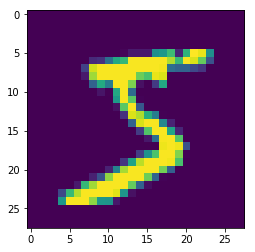

In [13]:
image,label = dataset[0]
plt.imshow(image)
print('Label:',label)

In [14]:
import torchvision.transforms as transforms

In [16]:
dataset = MNIST(root = 'data/',train = True,
                transform = transforms.ToTensor())
img_tensor,label = dataset[0]
print(img_tensor.shape,label)

torch.Size([1, 28, 28]) 5


In [17]:
print(img_tensor[:,10:15,10:15])
print(torch.max(img_tensor),torch.min(img_tensor))

tensor([[[0.0039, 0.6039, 0.9922, 0.3529, 0.0000],
         [0.0000, 0.5451, 0.9922, 0.7451, 0.0078],
         [0.0000, 0.0431, 0.7451, 0.9922, 0.2745],
         [0.0000, 0.0000, 0.1373, 0.9451, 0.8824],
         [0.0000, 0.0000, 0.0000, 0.3176, 0.9412]]])
tensor(1.) tensor(0.)


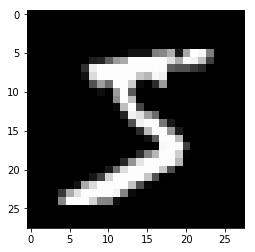

In [21]:
plt.imshow(img_tensor[0],cmap = 'gray')

In [22]:
import numpy as np
def split_indices(n,val_pct):
    n_val = int(val_pct*n)
    idxs = np.random.permutation(n)
    return idxs[n_val:],idxs[:n_val]

In [23]:
train_indices,val_indices = split_indices(len(dataset),0.2)

In [24]:
print(len(train_indices),len(val_indices))

48000 12000


In [28]:
from torch.utils.data.sampler import SubsetRandomSampler

In [31]:
from torch.utils.data.dataloader import DataLoader

In [32]:
batch_size = 100
train_sampler = SubsetRandomSampler(train_indices)
train_loader = DataLoader(dataset,batch_size,
                         sampler = train_sampler)
val_sampler = SubsetRandomSampler(val_indices)
val_loader = DataLoader(dataset,batch_size,
                         sampler = val_sampler)

In [35]:
import torch.nn as nn
input_size = 28*28
num_Classes = 10
model = nn.Linear(input_size,num_Classes)

In [36]:
print(model.weight.shape)

torch.Size([10, 784])


In [39]:
class MnistModel(nn.Module):
    def __init__(self):
        super().__init__()
        self.linear = nn.Linear(input_size,num_Classes)
    def forward(self,xb):
        xb = xb.reshape(-1,784)
        out = self.linear(xb)
        return out
model = MnistModel()
#使用 nn.Linear 对权重和偏置进行了实例化。
#在 forward 方法（在我们将一批输入传入模型时调用）中
#我们将输入张量展开，然后将其传递给 self.linear。

In [42]:
for images,labels in train_loader:
    outputs = model(images)
    break
print('outputs.shape:',outputs.shape)
print('Sample outputs :\n',outputs[:2].data)

outputs.shape: torch.Size([100, 10])
Sample outputs :
 tensor([[ 0.4466,  0.0882, -0.0772, -0.0705,  0.0140, -0.0097, -0.0587,  0.3224,
          0.1020,  0.0463],
        [-0.0308, -0.4110, -0.2060, -0.1596, -0.2346,  0.3207, -0.1473,  0.2430,
         -0.1472, -0.2062]])


In [43]:
import torch.nn.functional as F

In [44]:
probs = F.softmax(outputs,dim = 1)
print('sample probabilities:\n',probs[:2].data)
print('sum:',torch.sum(probs[0]).item())

sample probabilities:
 tensor([[0.1421, 0.0993, 0.0842, 0.0848, 0.0922, 0.0901, 0.0858, 0.1255, 0.1007,
         0.0953],
        [0.1045, 0.0714, 0.0877, 0.0918, 0.0852, 0.1485, 0.0930, 0.1374, 0.0930,
         0.0877]])
sum: 1.0


In [45]:
max_probs,preds = torch.max(probs,dim = 1)
print(preds)

tensor([0, 5, 2, 5, 7, 5, 7, 2, 9, 5, 2, 4, 3, 5, 5, 5, 4, 4, 5, 7, 5, 5, 7, 3,
        5, 5, 7, 7, 7, 3, 5, 5, 5, 7, 7, 5, 2, 5, 5, 5, 5, 5, 5, 4, 5, 5, 5, 7,
        5, 5, 4, 5, 5, 5, 5, 3, 7, 5, 2, 7, 5, 3, 4, 5, 5, 4, 5, 5, 2, 7, 2, 5,
        5, 5, 4, 5, 9, 5, 4, 7, 5, 0, 2, 2, 7, 5, 4, 7, 2, 5, 7, 4, 4, 4, 7, 5,
        4, 5, 5, 4])


In [46]:
labels

tensor([0, 9, 1, 9, 4, 8, 2, 1, 4, 3, 1, 5, 3, 5, 2, 0, 0, 6, 9, 5, 9, 9, 6, 4,
        7, 7, 1, 2, 1, 9, 0, 7, 3, 4, 0, 3, 1, 7, 8, 4, 9, 3, 9, 0, 5, 7, 8, 6,
        3, 9, 6, 8, 7, 4, 7, 3, 1, 9, 3, 1, 4, 6, 2, 7, 8, 0, 9, 4, 6, 7, 6, 4,
        7, 0, 7, 3, 4, 7, 4, 1, 0, 0, 2, 1, 0, 8, 0, 8, 1, 2, 8, 4, 4, 4, 2, 5,
        0, 7, 1, 2])

In [47]:
def accuracy(l1,l2):
    return torch.sum(l1 == l2).item()/len(l1)

In [48]:
accuracy(preds,labels)

0.13

In [49]:
loss_fn = F.cross_entropy

In [50]:
loss = loss_fn(outputs,labels)
print(loss)

tensor(2.3037, grad_fn=<NllLossBackward>)


In [51]:
learning_rate = 0.001
optimizer = torch.optim.SGD(model.parameters(),lr=learning_rate)

In [52]:
def loss_batch(model,loss_func,xb,yb,opt=None,metric=None):
    preds = model(xb)
    loss = loss_func(preds,yb)
    if opt is not None:
        loss.backward()
        opt.step()
        opt.zero_grad()
    metric_result = None
    if metric is not None:
        metric_result = metric(preds,yb)
    return loss.item(),len(xb),metric_result

[]


[1, 2]
